In [1]:
import os

os.chdir('..')

COVID_CLS = ["covid", "non-covid", "normal"]
MELANOMA_CLS = ["benign", "malignant"]

# config_name, CLS, H, W = "covid", COVID_CLS, 4, 4
config_name, CLS, H, W = "melanoma", MELANOMA_CLS, 4, 6

In [2]:
import hydra
import numpy as np

BATCH_SIZE = 1

with hydra.initialize(version_base=None, config_path="../conf/datamodule"):
    config = hydra.compose(config_name=config_name)
    config.batch_size = BATCH_SIZE

    data_module = hydra.utils.instantiate(config)
    dl = data_module.xai_dataloader()

/home/ppawlik-asus/xai_crp_lrp/venv_xai/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
images = []
labels = []

for img, c in dl:
    img = img[0].permute(1, 2, 0) * 255
    img = img.cpu().numpy().astype(np.uint8)
    images.append(img)
    labels.append(c.item())

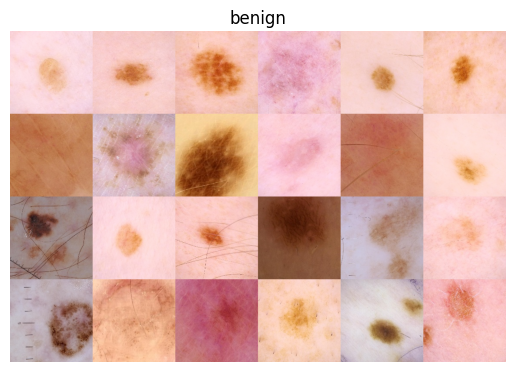

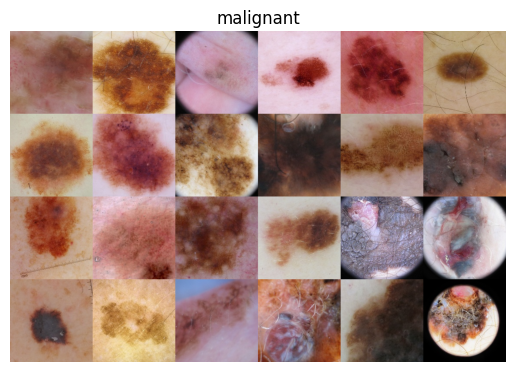

In [4]:
from utils import grid_images_filter
import matplotlib.pyplot as plt

for label, name in enumerate(CLS):
    plt.imshow(grid_images_filter(images, labels, label, H=H, W=W))
    plt.title(name)
    plt.axis('off')
    plt.savefig(f"{config_name}{label}.png", bbox_inches='tight', pad_inches=0)
    plt.show()